## Main modules

In [1]:
import pandas as pd
import numpy as np

## Plotting modules

In [13]:
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

## Models modules

In [14]:
from sklearn.svm import SVC
from sklearn import preprocessing, linear_model, naive_bayes, metrics, svm

import xgboost as xgb
import catboost as cgb
import lightgbm as lgb

## Random variable modules

In [11]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

## Model helper modules

In [12]:
from sklearn.model_selection import KFold,cross_val_score,train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn import decomposition, ensemble

In [2]:
ecdc = pd.read_csv("current-data-on-the-geographic-distribution-of-covid-19-cases-worldwide.csv", encoding= "ISo")

In [15]:
ecdc.head()

,daterep,day,month,year,cases,deaths,countriesandterritories,geoid,countryterritorycode,popdata2018,continentexp
0,NaN,28,4,2020,172,0,Afghanistan,AF,AFG,37172386.0,Asia
1,NaN,27,4,2020,68,10,Afghanistan,AF,AFG,37172386.0,Asia
2,NaN,26,4,2020,112,4,Afghanistan,AF,AFG,37172386.0,Asia
3,NaN,25,4,2020,70,1,Afghanistan,AF,AFG,37172386.0,Asia
4,NaN,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia


## Using plotly

In [40]:
fig = go.Figure(
    data=[go.Bar(x =ecdc.groupby("geoid").agg({"cases":"sum"}).index ,y=ecdc.groupby("geoid").agg({"cases":"sum"})["cases"])],
    layout_title_text="Number of cases by GeoId"
)
fig.show()

In [37]:
ecdc.groupby("geoid").agg({"cases":"sum"}).index

Index(['AD', 'AE', 'AF', 'AG', 'AI', 'AL', 'AM', 'AO', 'AR', 'AT',
       ...
       'VC', 'VE', 'VG', 'VI', 'VN', 'XK', 'YE', 'ZA', 'ZM', 'ZW'],
      dtype='object', name='geoid', length=206)

## Using matplotlib.pyplot

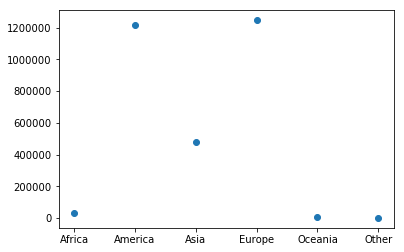

In [46]:
plt.scatter(ecdc.groupby("continentexp").agg({"cases":"sum"}).index, ecdc.groupby("continentexp").agg({"cases":"sum"})["cases"])
plt.show()

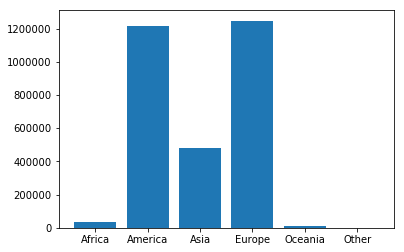

In [48]:
plt.bar(ecdc.groupby("continentexp").agg({"cases":"sum"}).index, ecdc.groupby("continentexp").agg({"cases":"sum"})["cases"])
plt.show()

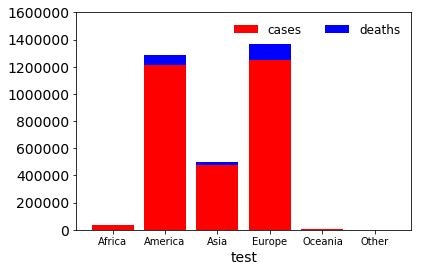

In [60]:
p1 = plt.bar(ecdc.groupby("continentexp").agg({"cases":"sum"}).index, ecdc.groupby("continentexp").agg({"cases":"sum"})["cases"], color='r')
p2 = plt.bar(ecdc.groupby("continentexp").agg({"deaths":"sum"}).index, ecdc.groupby("continentexp").agg({"deaths":"sum"})["deaths"], bottom=ecdc.groupby("continentexp").agg({"cases":"sum"})["cases"], color='b')

plt.ylim([0,1600000])
plt.yticks(fontsize=14)
plt.xlabel('test', fontsize=14)
plt.legend((p1[0], p2[0]), ("cases", "deaths"), fontsize=12, ncol=2, framealpha=0, fancybox=True)
plt.show()

## Using sns for plotting

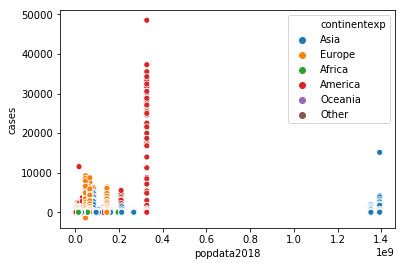

In [65]:
sns.scatterplot(x="popdata2018", y="cases", hue="continentexp", data=ecdc);

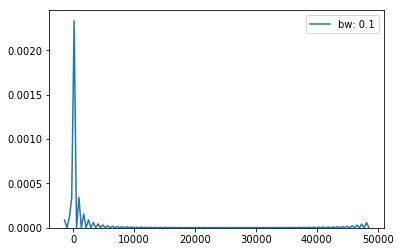

In [89]:
sns.kdeplot(ecdc["cases"], label="bw: 0.1");

In [163]:
def data_explore(data):
    num_list = data.select_dtypes(include=np.number).columns.tolist()
    cat_list = data.select_dtypes(include=np.object).columns.tolist()
    
    for var in num_list:
        if(sum(1*(data[var].isnull())) != len(data)):
            plt.figure(var)
            print(data[var].describe())
            sns.kdeplot(data[var]);
        
    for var in cat_list:
        if(sum(1*(data[var].isnull())) != len(data)):
            plt.figure(var)
            print(data[var].value_counts())
            sns.countplot(data[var]);

count    13623.000000
mean        16.433972
std          8.600193
min          1.000000
25%          9.000000
50%         17.000000
75%         24.000000
max         31.000000
Name: day, dtype: float64
count    13623.000000
mean         3.016002
std          1.252996
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: month, dtype: float64
count    13623.000000
mean      2019.995082
std          0.069959
min       2019.000000
25%       2020.000000
50%       2020.000000
75%       2020.000000
max       2020.000000
Name: year, dtype: float64
count    13623.000000
mean       218.945019
std       1554.359440
min      -1430.000000
25%          0.000000
50%          1.000000
75%         27.000000
max      48529.000000
Name: cases, dtype: float64
count    13623.000000
mean        15.429274
std        119.405913
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4928.000000
Name: death

C:\Users\GadikatlaV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning:

invalid value encountered in greater

C:\Users\GadikatlaV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning:

invalid value encountered in less



Iran                                 120
Russia                               120
Denmark                              120
Singapore                            120
Germany                              120
Australia                            120
United_Kingdom                       120
Switzerland                          120
Canada                               120
Japan                                120
Italy                                120
Netherlands                          120
Iceland                              120
Sweden                               120
Brazil                               120
South_Korea                          120
Norway                               120
Belgium                              120
China                                120
United_States_of_America             120
Austria                              120
France                               120
Czechia                              120
India                                119
Bahrain         

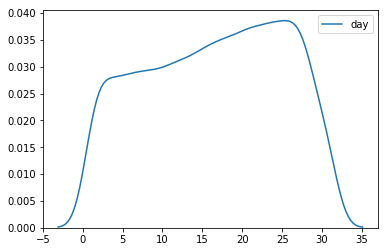

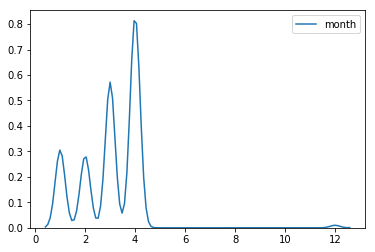

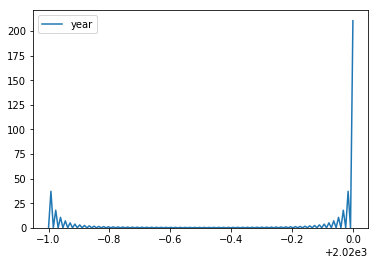

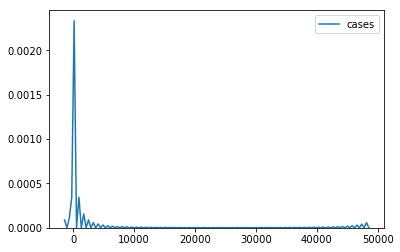

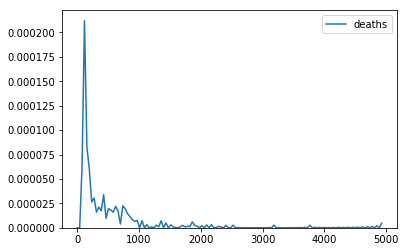

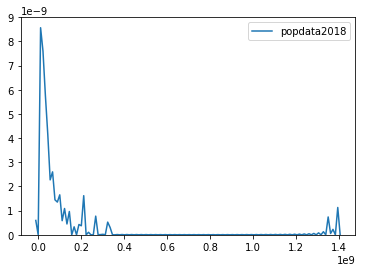

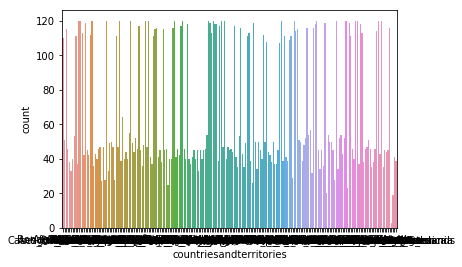

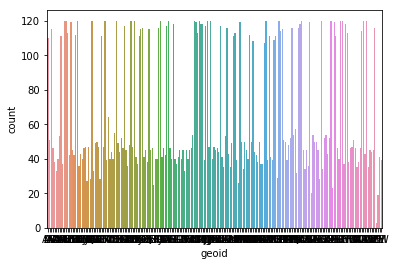

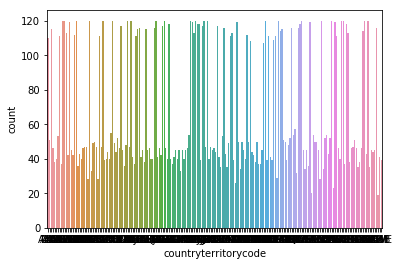

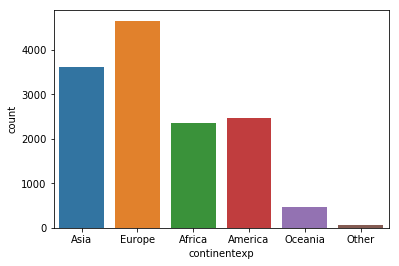

In [164]:
data_explore(ecdc)

In [ ]:
lgb_opt_params = {
    'learning_rate':0.01,    
    'boosting_type': 'gbdt',
    "objective" : "binary",
    "metric" : "auc",
    "num_leaves" : 40,
    "bagging_fraction" : 0.8,
    "feature_fraction" : 0.6,
    "reg_alpha": 2, 
    "reg_lambda":0.1,
    "bagging_seed" : 2018,
    "verbosity" : -1
    }

lgbh = f.SklearnHelper(clf=lgb.LGBMClassifier, seed=SEED, params=lgb_opt_params )


# Optimizo parametro n_estimators
cvlgm = lgb.cv(lgb_opt_params,lgb.Dataset(train,label=Ytrain),stratified=True,
               verbose_eval=False,early_stopping_rounds=70,num_boost_round=1000,seed=SEED)
lgbParams = lgb_opt_params.copy()
lgbParams['n_estimators']=len(cvlgm['auc-mean'])
categs = lgbParams.pop('categorical_column', None)
lgbh.clf.set_params(**lgbParams)
print("LGB auc:",round(cvlgm['auc-mean'][-1],5)," auc-stdv:",round(cvlgm['auc-stdv'][-1],6), " best It:",len(cvlgm['auc-mean']))

kf = KFold(n_splits=5, shuffle=True, random_state=SEED)
cvlgm = lgbh.get_cv_score(train, Ytrain, kf)
print(cvlgm.mean())
cvPred = lgbh.cross_val_predict(train, Ytrain, kf,method='predict_proba')
cvPred= cvPred[:,1]
average_precision = metrics.average_precision_score(Ytrain, cvPred)
precision, recall, thresholds = metrics.precision_recall_curve(Ytrain, cvPred)
#for i in np.arange(0.20, 0.40, 0.01):
#    print(i,' - ',metrics.f1_score(Ytrain, np.where(cvPred>i,1,0)))
    #max 0.29
    
# Entreno modelo
lgbh.clf.fit(train, Ytrain)
# Realizo predicciones
pModelLGB = lgbh.clf.predict_proba(test)[:,1]

lgbh.clf.fit(train, Ytrain)
# Realizo predicciones
pModelLGB = lgbh.clf.predict_proba(test)[:,1]

thresholdTrain=0.29
posTest=int(len(pModelLGB)*cvPred[cvPred>thresholdTrain].shape[0]/cvPred.shape[0])
thresholdTest = pd.Series(pModelLGB).sort_values(ascending=False).iloc[posTest]
